<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas 1: *Clustering***

### **Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Yosabad Torando Sirait"
KELAS = "C"
NPM = "2006597046"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yosabad Torando Sirait dari kelas C dengan NPM 2006597046, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yosabad Torando Sirait)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [46]:
# Import library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [5]:
# Import and read data
df = pd.read_csv('penguin.csv')
df.head()

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [6]:
# Get the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [7]:
# Split the data to numerical and categorical
nums = ['panjang_paruh_atas', 'tebal_paruh_atas', 'panjang_sirip', 'massa_tubuh']
cats = ['pulau_habitat', 'jenis_kelamin']

In [8]:
# Check duplicated data
df.duplicated().sum()

0

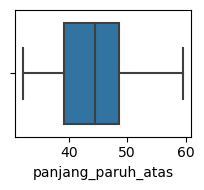

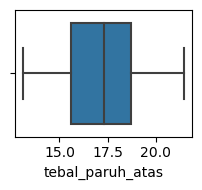

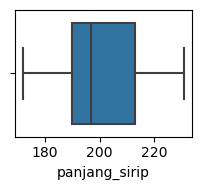

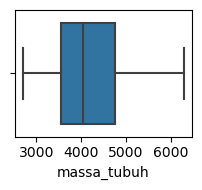

In [15]:
# Check outlier using boxplot
for col in nums:
    plt.figure(figsize=(8, 2))
    plt.subplot(1, 4, 4)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

Keterangan: Data berikut tidak memiliki nilai duplikat dan nilai outlier

3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [16]:
# Describe numerical data
df[nums].describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [17]:
# Describe categorical data
df[cats].describe()

,pulau_habitat,jenis_kelamin
count,344,334
unique,3,3
top,Biscoe,MALE
freq,168,168


In [18]:
# Check unique value of jenis_kelamin
df['jenis_kelamin'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [19]:
# Check '.' jenis_kelamin
df[df['jenis_kelamin']=='.']

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
336,Biscoe,44.5,15.7,217.0,4875.0,.


4. Lakukan penanganan terhadap *missing values* [2]

In [20]:
# Check the number of missing values
df.isna().sum()

pulau_habitat          0
panjang_paruh_atas     2
tebal_paruh_atas       2
panjang_sirip          2
massa_tubuh            2
jenis_kelamin         10
dtype: int64

Keterangan: Fitur yang memiliki nilai *null* adalah panjang_paruh_atas, tebal_paruh_atas, panjang_sirip, massa_tubuh, dan jenis_kelamin

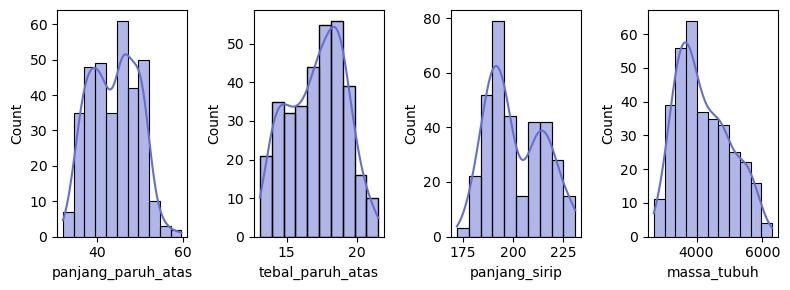

In [25]:
# Perform visualization to see the distribution of numerical data
plt.figure(figsize=(8, 3))
for i in range(len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color="#646FD4", kde=True)
    plt.tight_layout()

Keterangan:
- Feature panjang_paruh_atas merupakan distribusi bimodal dan memiliki perbandingan nilai mean dan median yang tidak terlalu jauh sehingga missing value akan diisi dengan rata-rata dari data tersebut
- Feature tebal_paruh_atas merupakan distribusi bimodal dan memiliki perbandingan nilai mean dan median yang tidak terlalu jauh sehingga missing value akan diisi dengan rata-rata dari data tersebut
- Feature panjang_sirip merupakan distribusi bimodal dan memiliki perbandingan nilai mean dan median yang tidak terlalu jauh sehingga missing value akan diisi dengan rata-rata dari data tersebut
- Feature massa_tubuh merupakan distribusi right skewed sehingga missing value akan diisi dengan nilai tengah dari data tersebut

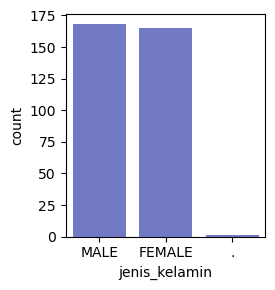

In [30]:
# Perform visualization to see the distribution of categorial data
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
plots = sns.countplot(x=df['jenis_kelamin'], color="#646FD4")
plt.tight_layout()

Keterangan: Fitur jenis_kelamin memiliki perbedaan nilai yang tidak terlalu signifikan. Selain itu, terdapat pula jenis kelamin yang tidak diketahui. Dengan demikian, nilai missing value dan nilai yang tidak diketahui akan diisi dengan nilai terbanyak dari data tersebut

In [31]:
# Fill missing values
df['panjang_paruh_atas'].fillna(df['panjang_paruh_atas'].mean(), inplace=True)
df['tebal_paruh_atas'].fillna(df['tebal_paruh_atas'].mean(), inplace=True)
df['panjang_sirip'].fillna(df['panjang_sirip'].mean(), inplace=True)
df['massa_tubuh'].fillna(df['massa_tubuh'].median(), inplace=True)
df['jenis_kelamin'].fillna(df['jenis_kelamin'].mode()[0], inplace=True)
df.loc[336, 'jenis_kelamin'] = df['jenis_kelamin'].mode()[0]

In [32]:
# Get information of new data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  344 non-null    float64
 2   tebal_paruh_atas    344 non-null    float64
 3   panjang_sirip       344 non-null    float64
 4   massa_tubuh         344 non-null    float64
 5   jenis_kelamin       344 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

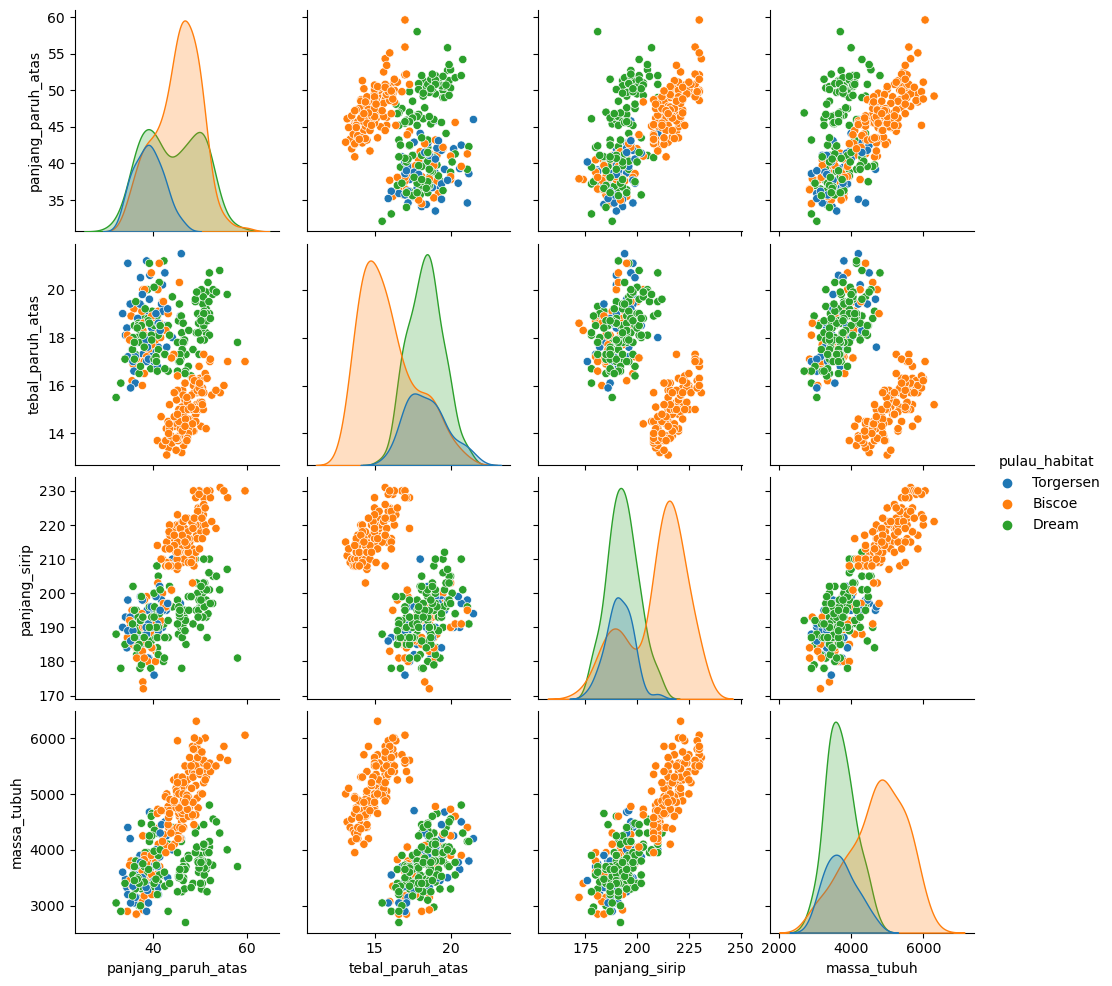

In [33]:
# Bivariate analysis using pairplot
sns.pairplot(df, hue='pulau_habitat')
plt.show()

Keterangan: Berdasarkan pairplot di atas, dapat dilihat bahwa feature panjang_sirip dengan massa_tubuh memiliki persebaran yang cukup dekat yang mengindikasikan bahwa keduanya cukup berkorelasi

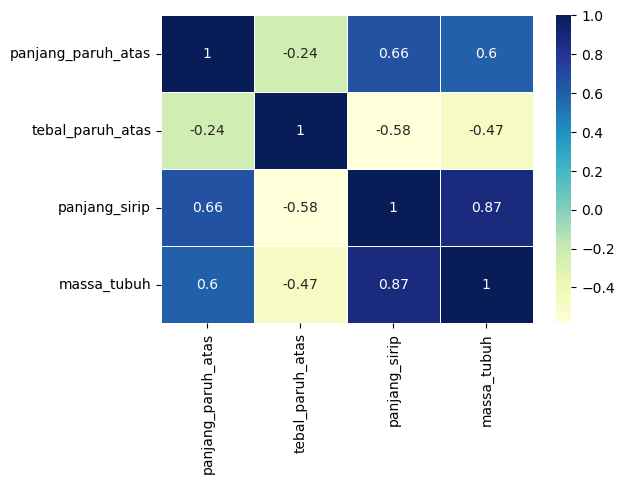

In [34]:
# Bivariate analysis using heatmap correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5);

Keterangan: Berdasarkan heatmap di atas, terbukti bahwa feature panjang_sirip dengan massa_tubuh berkorelasi kuat dengan nilai korelasi  0.87

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

Jawab: Atribut yang akan saya gunakan untuk penentuan klaster adalah tebal_paruh_atas dan massa_tubuh. Alasan saya memilih kedua atribut tersebut karena saya ingin melihat persebaran kelompok penguin berdasarkan massa tubuh serta panjang paruhnya. Selain itu, saya pun tertarik untuk mengetahui pembagian jenis-jenis penguin apabila dilakukan penelitian lebih lanjut berdasarkan tebal paruh atas dan massa tubuh.

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [60]:
# Move data to new variable
df_cls = df.loc[:, ['tebal_paruh_atas','massa_tubuh']]

In [61]:
# Scaling
df_scaler = MinMaxScaler()
df_scaled = df_scaler.fit_transform(df_cls)
new_df = pd.DataFrame(data=df_scaled, columns=['tebal_paruh_atas','massa_tubuh'])

For n_clusters = 2 The average silhouette_coefficient is : 0.6168971791908014
For n_clusters = 3 The average silhouette_coefficient is : 0.49457219890414844
For n_clusters = 4 The average silhouette_coefficient is : 0.465139998003064
For n_clusters = 5 The average silhouette_coefficient is : 0.3997255179913156
For n_clusters = 6 The average silhouette_coefficient is : 0.41032910820492213


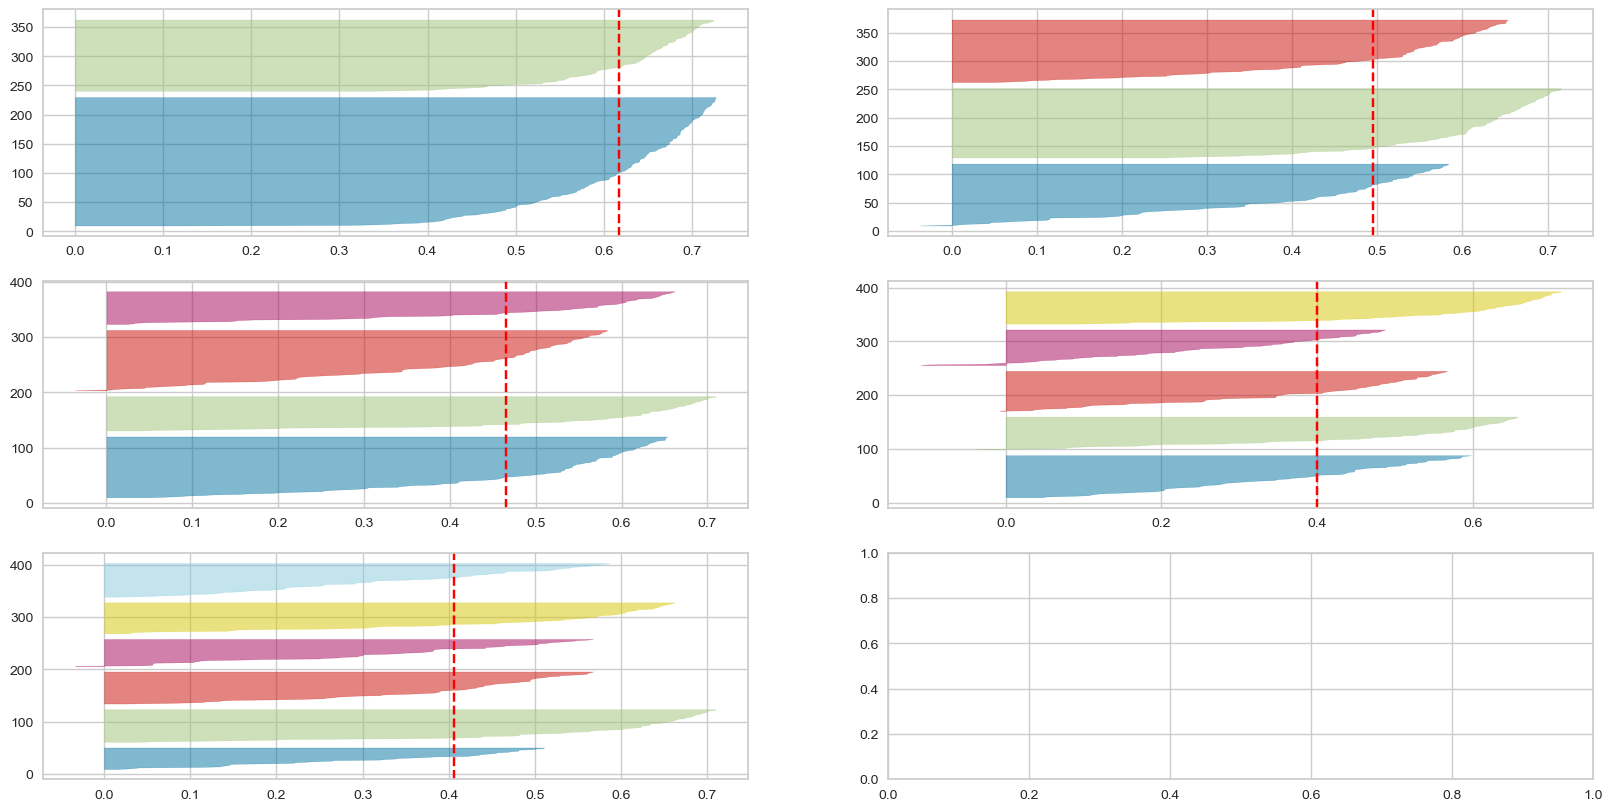

In [62]:
# Silhouette
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in [2, 3, 4, 5, 6]:
    cluster = KMeans(n_clusters = k)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(cluster, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(new_df)

    cluster_labels = cluster.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

Keterangan: Dapat dilihat bahwa klaster 2 memiliki nilai rata-rata silhouette yang cukup tinggi yang menandakan bahwa setiap data poin sudah cukup fit ke setiap klaster yang dibuat (jarak data poin dan neighbor-nya)

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [63]:
kmeans = KMeans(n_clusters=2, random_state=26).fit(new_df)
labels = kmeans.labels_
new_df["cluster"] = kmeans.labels_

In [64]:
new_df

,tebal_paruh_atas,massa_tubuh,cluster
0,0.666667,0.291667,1
1,0.511905,0.305556,1
2,0.583333,0.152778,1
3,0.482282,0.375000,1
4,0.738095,0.208333,1
...,...,...,...
339,0.482282,0.375000,1
340,0.142857,0.597222,0
341,0.309524,0.847222,0
342,0.202381,0.694444,0


9. Visualisasikan klaster yang ada [5]

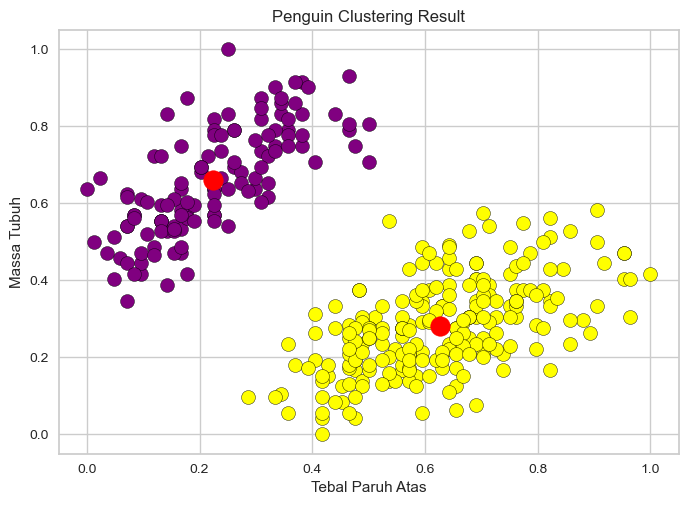

In [65]:
plt.scatter(new_df['tebal_paruh_atas'][new_df['cluster'] == 0], new_df['massa_tubuh'][new_df['cluster'] == 0], c="purple",s=100, edgecolor='black')
plt.scatter(new_df['tebal_paruh_atas'][new_df['cluster'] == 1], new_df['massa_tubuh'][new_df['cluster'] == 1], c="yellow",s=100, edgecolor='black')

center = kmeans.cluster_centers_
plt.scatter(center[:,0], center[:, 1], c='red', s=200)
plt.title("Penguin Clustering Result")
plt.xlabel('Tebal Paruh Atas')
plt.ylabel('Massa Tubuh')
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]

Berdasarkan hasil pengelompokan di atas:
- Cluster pertama (ungu) yaitu kelompok penguin yang tebal paruhnya tidak terlalu panjang memiliki massa tubuh yang cukup berat
- Cluster kedua (kuning) yaitu kelompok penguin yang panjang paruhnya cukup panjang memiliki massa tubuh yang tidak terlalu berat
- Pengelompokkan tersebut tidak bisa menjadi kesimpulan final karena terdapat beberapa penguin yang nilai tebal paruhnya berada di pertengahan namun massa tubuhnya ada yang ringan dan berat

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [85]:
df_agg = df.loc[:, ['tebal_paruh_atas','massa_tubuh']]
df_aggsr = MinMaxScaler()
df_aggsd = df_aggsr.fit_transform(df_agg)
new_df_agg = pd.DataFrame(data=df_aggsd, columns=['tebal_paruh_atas','massa_tubuh'])

In [86]:
ac_model_no_clusters = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="ward")
ac_model_no_clusters.fit(df_aggsd)
labels_no_clusters = ac_model_no_clusters.labels_

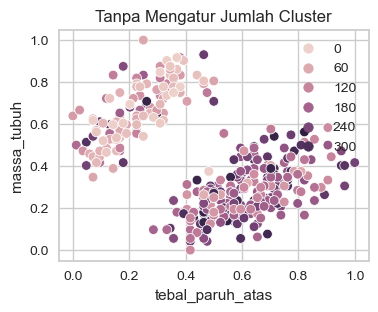

In [87]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=new_df_agg, x='tebal_paruh_atas', y='massa_tubuh', hue=labels_no_clusters).set_title('Tanpa Mengatur Jumlah Cluster')
plt.show()

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

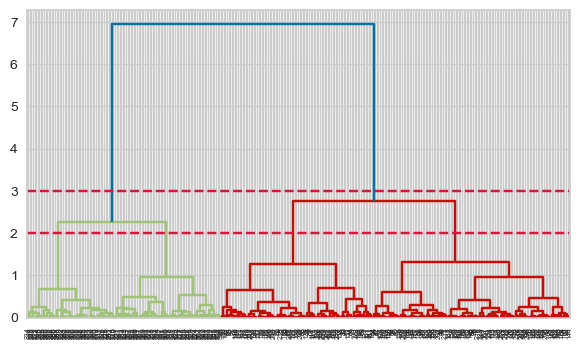

In [89]:
clusters = shc.linkage(df_aggsd, method="ward")

plt.figure(figsize=(7, 4))
dendrogram = shc.dendrogram(clusters)

# Ambang batas
plt.axhline(3, color='crimson', linestyle='--')
plt.axhline(2, color='crimson', linestyle='--')
plt.show()

Notes:
- Berdasarkan dendogram di atas--*melalui ambang batas*--dapat dilihat bahwa jumlah cluster optimal yang memungkinkan ada 2 buah, yaitu K=2 dan K=4. Untuk melihat nilai K paling optimal, di bawah ini akan disediakan grafik berdasarkan nilai silhouette-nya:

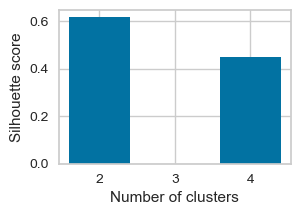

In [94]:
ac2 = AgglomerativeClustering(n_clusters = 2)
ac4 = AgglomerativeClustering(n_clusters = 4)

k = [2,4]
slth_scores = []

slth_scores.append(silhouette_score(new_df_agg, ac2.fit_predict(new_df_agg)))
slth_scores.append(silhouette_score(new_df_agg, ac4.fit_predict(new_df_agg)))

plt.figure(figsize=(3,2))
plt.bar(k, slth_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [95]:
ac_model_with_clusters = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_model_with_clusters.fit(df_aggsd)
labels_with_clusters = ac_model_with_clusters.labels_

14. Visualisasikan hasil *clustering assignment* [4]

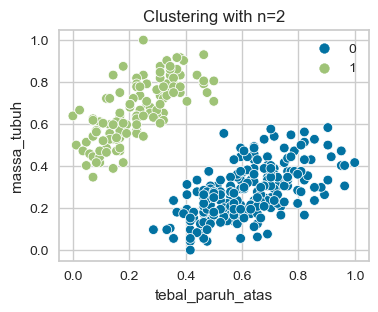

In [96]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=new_df_agg, x='tebal_paruh_atas', y='massa_tubuh', hue=labels_with_clusters).set_title('Clustering with n=2')
plt.show()

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
> Clustering merupakan algoritma unsupervised yang menggunakan data numerik pada penerapannya. Apabila tetap ingin menggunakan data kategorik, kita dapat melakukan *feature engineering* yang bertujuan untuk mengubah data kategori menjadi data numerik, seperti *one-hot encoding*.
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
> Karena algoritma KMeans bertujuan untuk mengelompokkan setiap data melalui jarak terdekat dengan centroidnya. Apabila sebaran data tidak globular maka akan sulit untuk mencari jarak terdekat setiap data dan apabila dilakukan pun maka hasilnya tidak akan signifikan. 
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
> Method KMeans tentunya tidak akan memberi hasil yang sama karena setiap kali dijalankan maka urutan setiap data akan berubah. Hal ini sesuai dengan cara kerja clustering itu sendiri yang mana setiap data akan diacak sampai menemukan pemberhentian akhir  sedemikian hingga jaraknya akan mendekati centroid di setiap cluster. Dengan demikian, hasil plot yang akan dimuat akan **terlihat** sama saat dijalankan berkali-kali dengan asumsi tidak ada pengubahan data.
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]
> Intra-cluster distance merupakan jarak dari setiap data di dalam suatu cluster sedangkan Inter-cluster distance merupakan jarak dari beberapa data di dua cluster yang berbeda.
- Inter-cluster memiliki beberapa tipe:
    - Single linkage:
    ![Single](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-bde58b186b265a7a880d1e641bbbf5d6_l3.svg)
    - Complete linkage
    ![Complete](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-396b73057f4546ef38aad33c8fe7c450_l3.svg)
    - Average linkage
    ![Avg](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-97d98a11650297d6a26156a8ff2b0f1f_l3.svg)
    - Centroid linkage
    ![Centroid](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-8593d1ffa7e786d81f3c8283419a7fd4_l3.svg)
    - Average centroid linkage
    ![Avg Centroid](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-e49a1d0757c437432d4c984280158d40_l3.svg)
- Intra-cluster memiliki beberapa tipe:
    - Complete Diameter:
    ![Complete](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-2055a3c844343450ac227d93f746bc1d_l3.svg)
    - Average Diameter:
    ![Avg](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-aaa1dedcf7d4570911c7f0d83f8cebb7_l3.svg)
    - Centroid Diameter:
    ![Centroid](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-09f23b1b680bbb34edec1efa9b719f96_l3.svg)